In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
X = np.array([1, 2, 3, 4]).reshape(-1, 1)
y = np.array([1, 2, 3, 0])

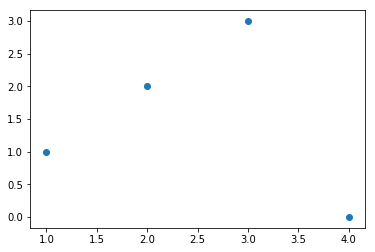

In [12]:
plt.scatter(X, y)

In [14]:
X_m = np.hstack([np.ones_like(X), X])
X_m

array([[1, 1],
       [1, 2],
       [1, 3],
       [1, 4]])

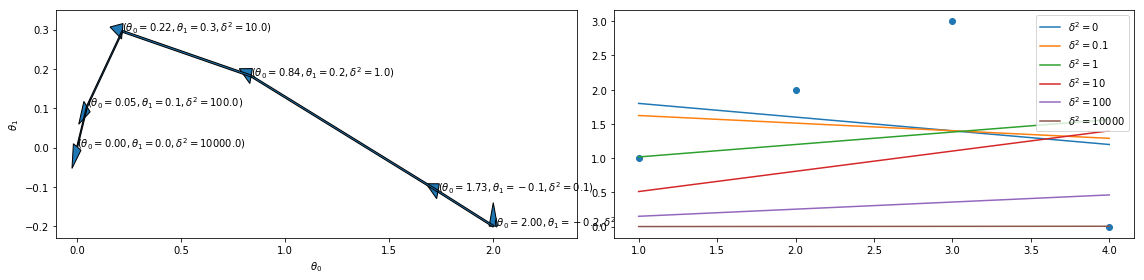

In [65]:
fig, ax  = plt.subplots(ncols=2, figsize=(16, 4))
ax[1].scatter(X, y)
prev_solution = np.linalg.inv(X_m.T@X_m)@(X_m.T@y)
for lam in [0,   1e-1, 1, 10, 100,  10000]:
    solution = np.linalg.inv(X_m.T@X_m + lam*np.eye(2))@(X_m.T@y)
    ax[0].arrow(prev_solution[0], prev_solution[1], solution[0]-prev_solution[0], solution[1]-prev_solution[1], 
              head_width=0.04, width=0.005)
    ax[0].annotate(r"($\theta_0 = %0.2f, \theta_1 = %0.1f, \delta^2 = %0.1f)$" %(solution[0], solution[1], lam), xy=(solution[0], solution[1]))
    prev_solution = solution
    #plt.title(lam)
    ax[0].set_xlim((-0.1, 2.4))
    ax[0].set_ylim(-0.23,0.35)
    ax[0].set_xlabel(r"$\theta_0$")
    ax[0].set_ylabel(r"$\theta_1$")
    ax[1].plot(X, solution[0]+solution[1]*X, label=r'$\delta^2={}$'.format(lam))
plt.legend()
fig.tight_layout()

In [68]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [75]:
@widgets.interact(
    lam = [0,   1e-1, 1, 10, 100,  10000])
def plot(lam=0, grid=True):
    fig, ax  = plt.subplots(ncols=2, figsize=(16, 4))
    ax[1].scatter(X, y)
    solution = np.linalg.inv(X_m.T@X_m + lam*np.eye(2))@(X_m.T@y)
    ax[0].scatter([solution[0]], [solution[1]])
    ax[0].set_xlim((-0.1, 2.4))
    ax[0].set_ylim(-0.23,0.35)
    ax[0].set_xlabel(r"$\theta_0$")
    ax[0].set_ylabel(r"$\theta_1$")
    ax[0].grid(grid)
    ax[1].grid(grid)
    ax[1].plot(X, solution[0]+solution[1]*X, label=r'$\delta^2={}$'.format(lam))

interactive(children=(Dropdown(description='lam', options=(0, 0.1, 1, 10, 100, 10000), value=0), Checkbox(valu…

In [79]:
@widgets.interact(lam=(0, 100)
    )
def plot(lam=0., grid=True):
    fig, ax  = plt.subplots(ncols=2, figsize=(16, 4))
    ax[1].scatter(X, y)
    solution = np.linalg.inv(X_m.T@X_m + lam*np.eye(2))@(X_m.T@y)
    ax[0].scatter([solution[0]], [solution[1]])
    ax[0].set_xlim((-0.1, 2.4))
    ax[0].set_ylim(-0.23,0.35)
    ax[0].set_xlabel(r"$\theta_0$")
    ax[0].set_ylabel(r"$\theta_1$")
    ax[0].grid(grid)
    ax[1].grid(grid)
    ax[1].plot(X, solution[0]+solution[1]*X, label=r'$\delta^2={}$'.format(lam), color='k')

interactive(children=(IntSlider(value=0, description='lam'), Checkbox(value=True, description='grid'), Output(…

In [93]:

def plot(lam=0., grid=True):
    fig, ax  = plt.subplots(ncols=2, figsize=(16, 4))
    ax[1].scatter(X, y)
    solution = np.linalg.inv(X_m.T@X_m + lam*np.eye(2))@(X_m.T@y)
    ax[0].scatter([solution[0]], [solution[1]])
    ax[0].set_xlim((-0.1, 2.4))
    ax[0].set_ylim(-0.23,0.35)
    ax[0].set_xlabel(r"$\theta_0$")
    ax[0].set_ylabel(r"$\theta_1$")
    ax[0].grid(grid)
    ax[1].grid(grid)
    ax[1].plot(X, solution[0]+solution[1]*X, label=r'$\delta^2={}$'.format(lam), color='k')
x = widgets.interact(plot, lam=widgets.FloatLogSlider(min=-2,max=5,step=1,value=-500));

interactive(children=(FloatLogSlider(value=0.01, description='lam', max=5.0, min=-2.0, step=1.0), Checkbox(val…